# Create a crowd of pedestrians with custom statistics

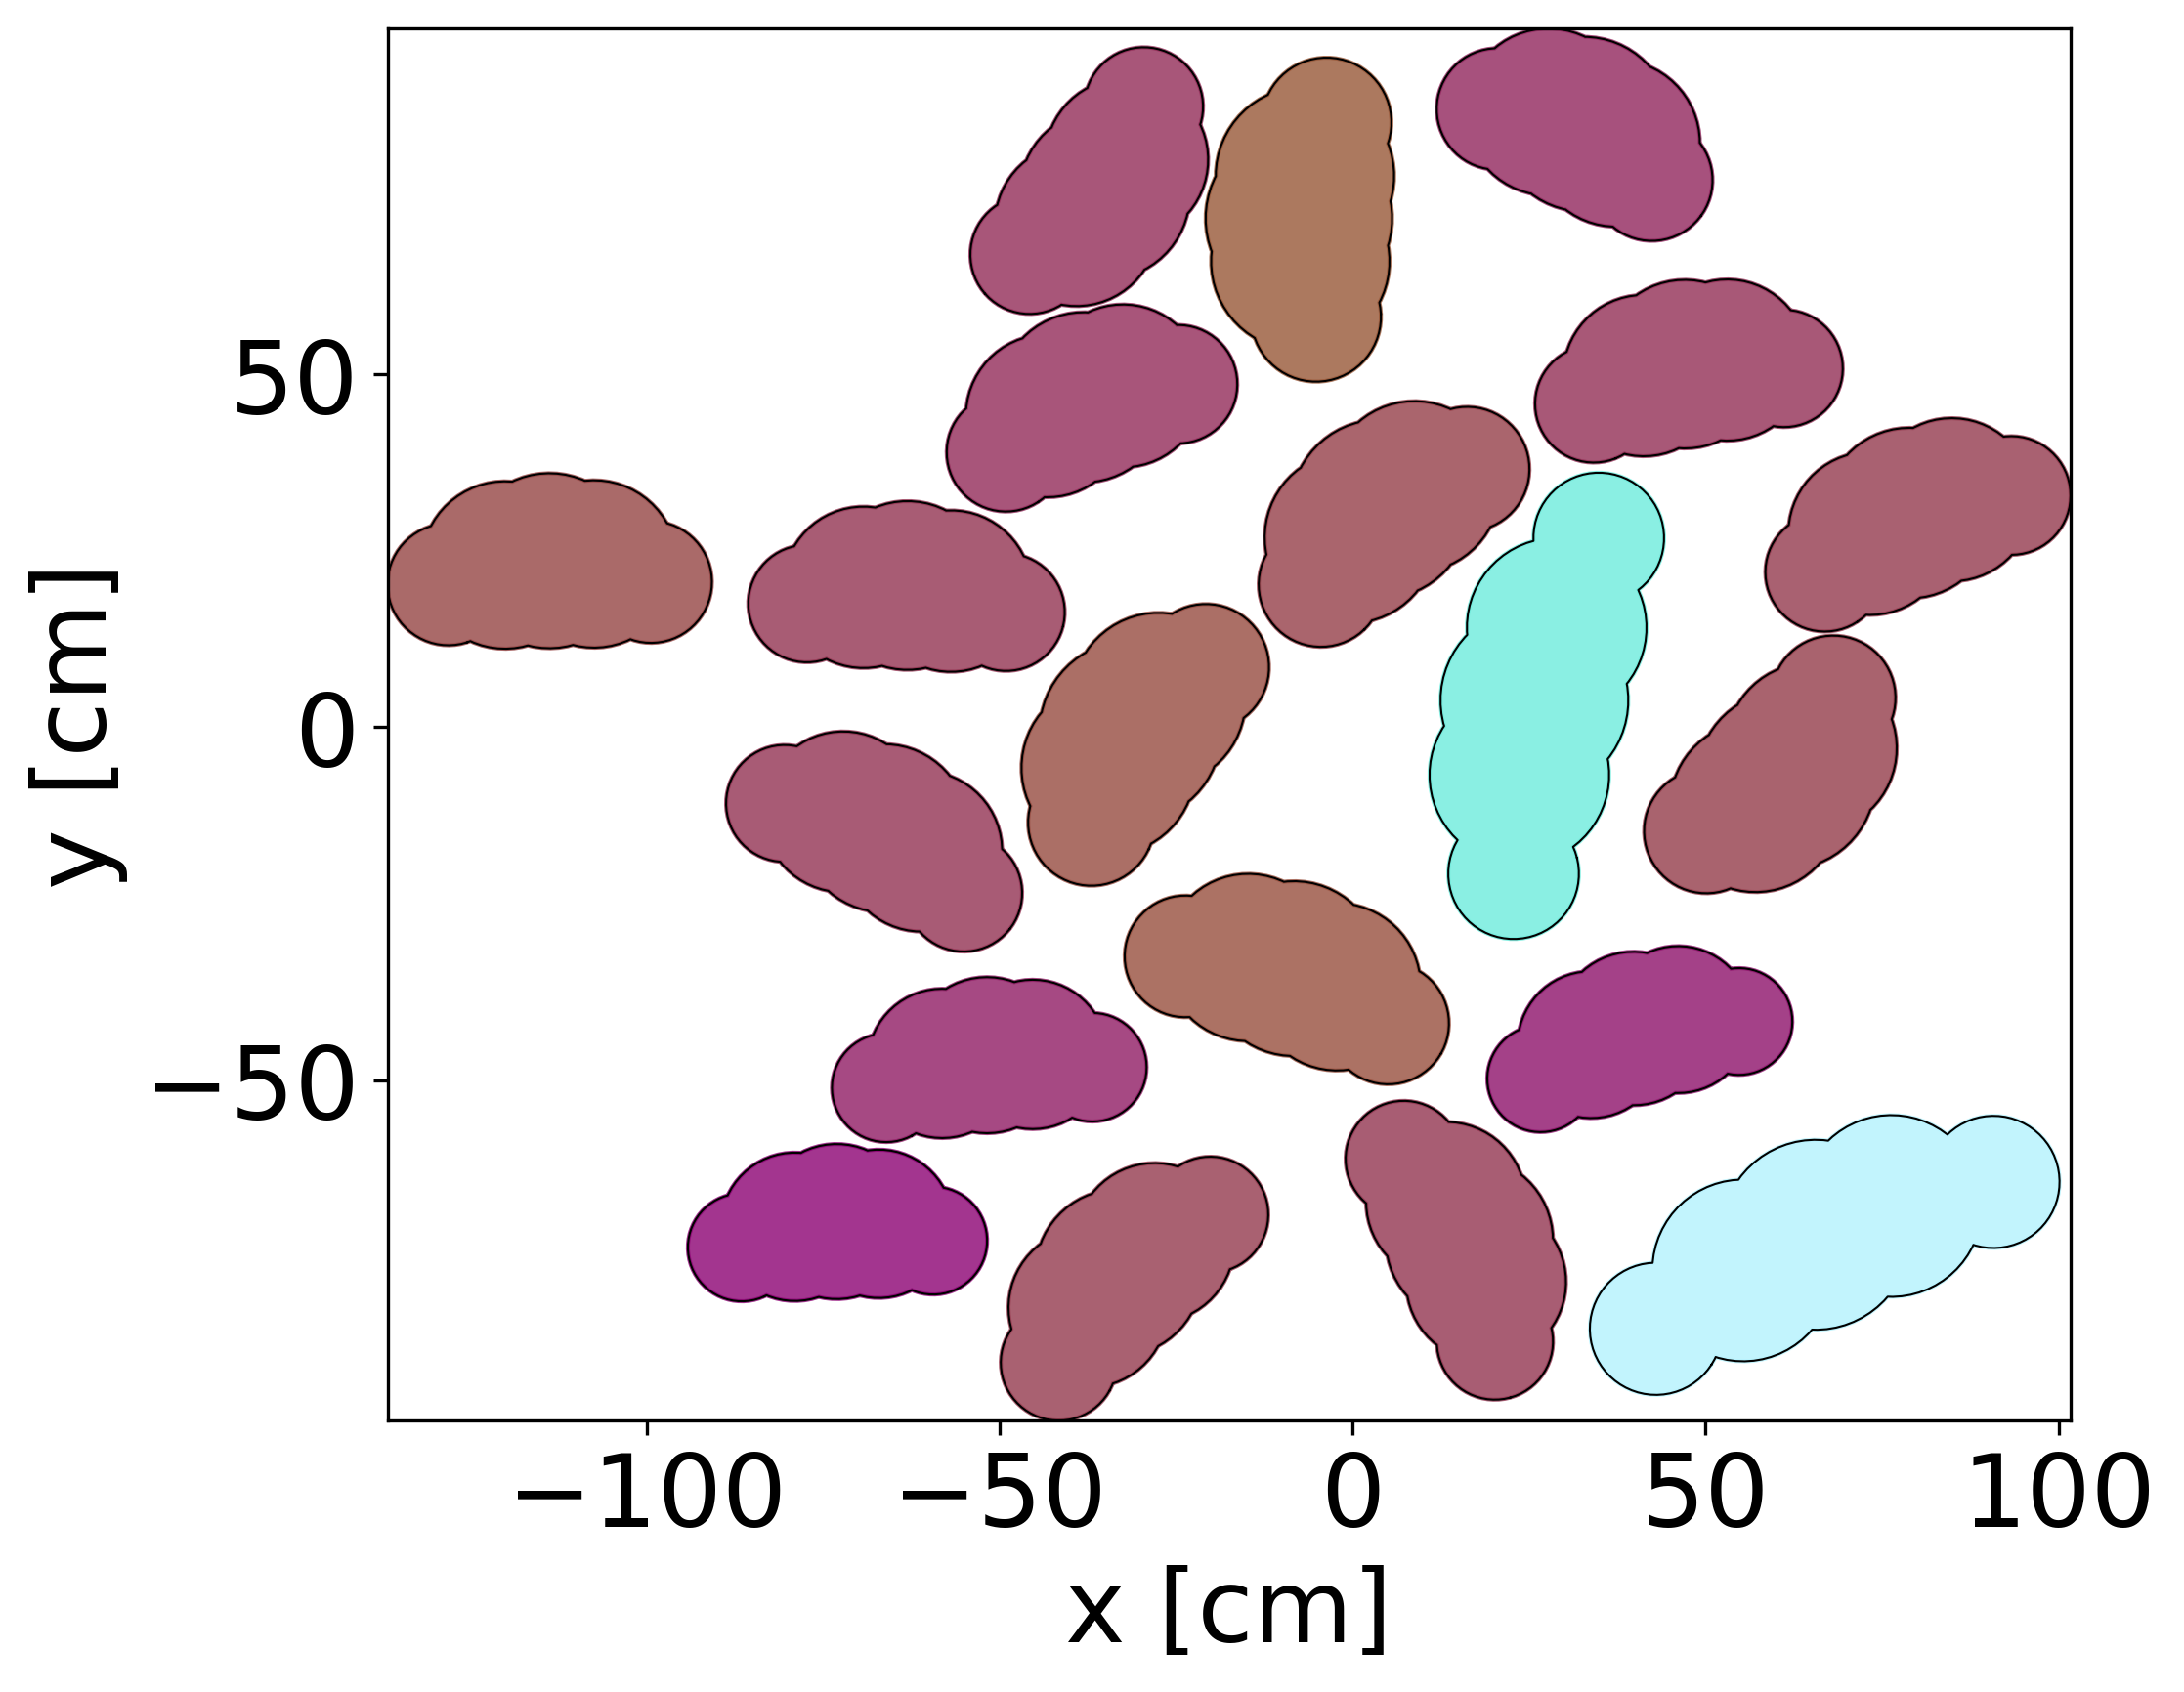

ZIP file successfully saved to /Volumes/desk_oscar/main/cours/phd_first_year/shape_project/code/data/xml/crowd_custom.zip


In [1]:
import matplotlib.pyplot as plt
from streamlit_app.plot import plot
from shapely.geometry import Polygon
from pathlib import Path

import configuration.utils.constants as cst
from configuration.models.crowd import Crowd
from configuration.models.measures import CrowdMeasures

%matplotlib inline

# Constants
boundaries = Polygon([
        (-150.0, -100.0),
        (150.0, -100.0),
        (150.0, 100.0),
        (-150.0, 100.0)
    ])
NUMBER_AGENTS: int = 20
REPULSION_LENGTH: float = 5.0  # (cm)
DESIRED_DIRECTION: float = 90.0  # (degrees)
RANDOM_PACKING: bool = True
agent_statistics = cst.CrowdStat.copy()

# Override specific values with st.session_state where applicable
agent_statistics.update(
    {
        "male_proportion": 0.2,
        "male_bideltoid_breadth_mean": 70.0, # cm
        "male_bideltoid_breadth_std_dev": 3.0, # cm
    })

# Initialize simulation components
crowd_measures = CrowdMeasures(agent_statistics=agent_statistics)
crowd = Crowd(boundaries=boundaries, measures=crowd_measures)

# Configure crowd agents
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(
    repulsion_length=REPULSION_LENGTH,
    desired_direction=DESIRED_DIRECTION,
    random_packing=RANDOM_PACKING
)

# Visualize results
fig = plot.display_crowd2D(crowd)
plt.show()

# Download the xml configuration files necessary for the simulation to a zip format
output_zip_path = Path.cwd().parent.parent / "data" / "xml" / "crowd_custom.zip"
crowd.save_crowd_data_to_zip(output_zip_path)